In [ ]:
#library imports

# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet

 #for testing on CPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow.keras
from tensorflow.keras.datasets import mnist
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
# MNIST dataset load training and testing slpit

#tensor flow   is used to  import the mnist using tensorflow.keras.datasets
#loaded data in both test and train var
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


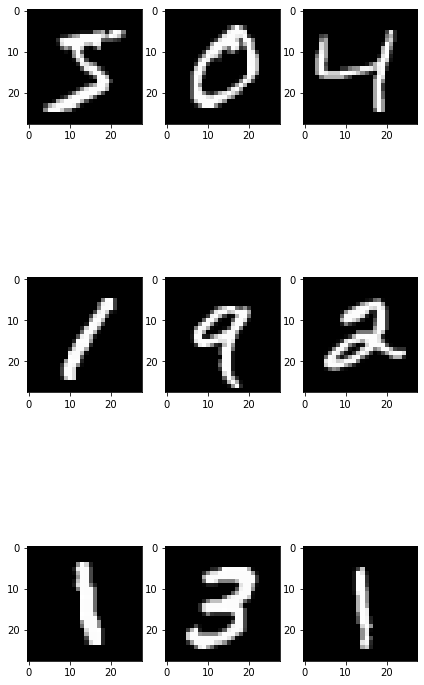

In [ ]:
#show  the digits loaded 
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


Text(0.5, 1.0, 'Pixel Value Distribution')

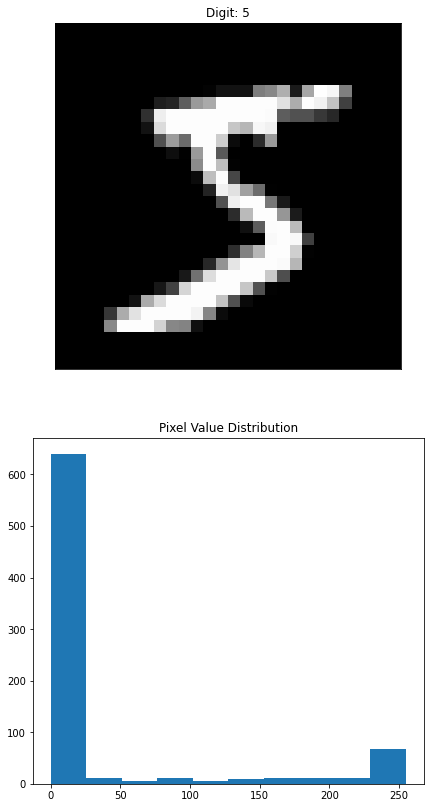

In [ ]:
# Pixels distribution sample for a single digit image 

plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")


In [ ]:
# Generation of  a input vector 2D from the 28 x 28 pixels image

# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [1]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

NameError: ignored

In [ ]:
# building a linear stack of layers with the sequential model

#Adding the input layer of MLP
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

#adding the hidden layer 1
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#adding the hidden layer 2
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#adding the Output layer
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/10
469/469 - 11s - loss: 0.2514 - accuracy: 0.9221 - val_loss: 0.1053 - val_accuracy: 0.9700 - 11s/epoch - 24ms/step
Epoch 2/10
469/469 - 10s - loss: 0.1097 - accuracy: 0.9673 - val_loss: 0.0899 - val_accuracy: 0.9726 - 10s/epoch - 22ms/step
Epoch 3/10
469/469 - 10s - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.0818 - val_accuracy: 0.9735 - 10s/epoch - 22ms/step
Epoch 4/10
469/469 - 10s - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0751 - val_accuracy: 0.9777 - 10s/epoch - 22ms/step
Epoch 5/10
469/469 - 10s - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0685 - val_accuracy: 0.9805 - 10s/epoch - 22ms/step
Epoch 6/10
469/469 - 10s - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0735 - val_accuracy: 0.9806 - 10s/epoch - 22ms/step
Epoch 7/10
469/469 - 11s - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0645 - val_accuracy: 0.9813 - 11s/epoch - 23ms/step
Epoch 8/10
469/469 - 10s - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0761 - val_accuracy: 0.9796 - 10s/epoch - 22ms/step


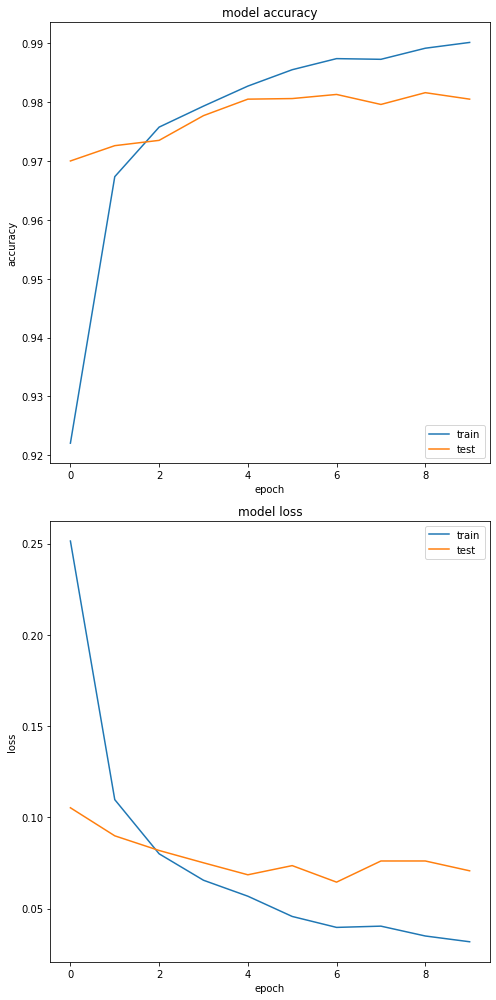

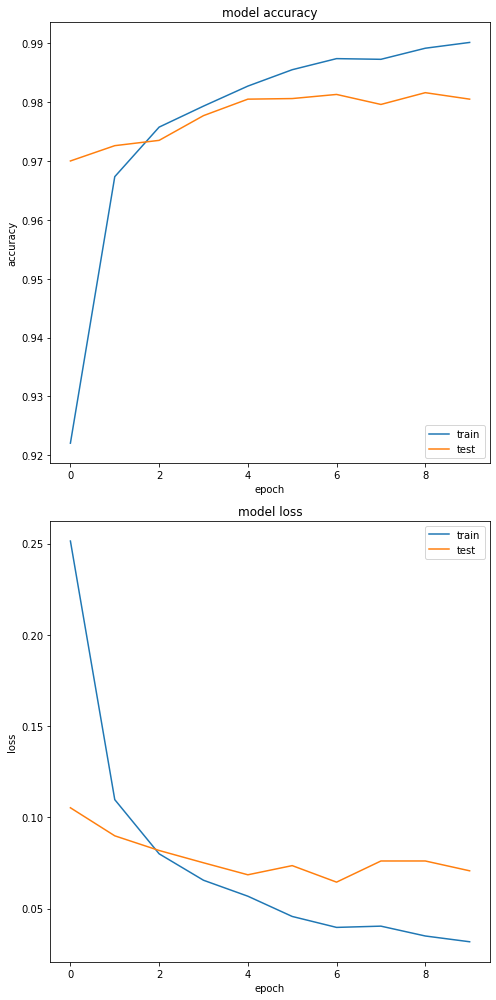

In [ ]:
# Trainig of the data 

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics  after the data trainig 
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [ ]:
mnist_model = load_model('/results/keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0707 - accuracy: 0.9805 - 1s/epoch - 3ms/step
Test Accuracy 0.9804999828338623



9805  predicted correctly
195  predicted incorrectly


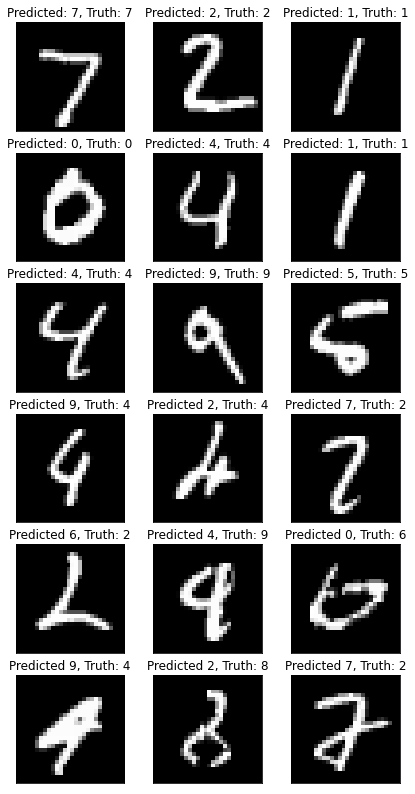

In [ ]:
#Predictions

# load the model and create predictions on the test set
mnist_model = load_model('/results/keras_mnist.h5')
#predicted_classes = mnist_model.predict_classes(X_test)
predicted_classes = np.argmax(model.predict(X_test),axis=1)
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices =np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," predicted correctly")
print(len(incorrect_indices)," predicted incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[0:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[0:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])



In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

